# Task 1 : Titanic Survival Prediction

*Varad Deshmukh*

---

**Instructions**

* Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
* The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

> ## Importing Libraries

In this project, along with the usual `NumPy` and `pandas`, we will need many modules from the `sklearn` library as well. To have an easier reference to the imported modules and classes and their usage at appropriate places, we will import them as they are required, and their rationale will be explained there itself.

In [59]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

> ## Loading the dataset

The survival data is present in the form of a 'csv' file named 'tested.csv'. We read that into a `pandas DataFrame` for subsequent analysis.

In [60]:
# read the 'tested.csv' file into a DataFrame and have a glimpse of it
titanic = pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> ## Data Preprocessing

Data Preprocessing involves understanding the datatypes of the columns, checking for any missing values and subsequently cleaning the data.

In [61]:
# high-level information of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [62]:
# checking for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We indeed have missing datapoints. The above code block shows that the number of missing values is very great in the 'Cabin' column, where 327/418 entries are missing. So we rather drop the column altogether, because imputing so many values using any strategy whatsoever is not a good idea.

In [63]:
# drop the 'Cabin' column
titanic.drop(columns='Cabin', axis=1, inplace=True)

Now coming to the 'Age' and 'Fare' columns, we have 86 null values in the former and 1 in latter. Both being numerical variables, it would be a good strategy to impute these missing data values using the mean of the respective columns. We do that next.

In [64]:
# impute the missing values in 'Age' abd 'Fare' columns using their mean
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

Having taken these steps, we now check our data for any missing values.

In [65]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

This, we have cleaned our data. We now move forwards to visualising our data.

> ## Data Visualisation

We want to predict the survival of the passengers on the ship. For that, we need to find the variables that influence the survival of passengers. For example, we want to find out the dependence of survival of passengers on their gender. So, we plot a categorical plot to visualise the relationship, because 'Sex' is a categorical variable.

We find out that of the 418 people on board, in our data, how many died and how many survived.

In [66]:
# counts based on survival status
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Next, we plot the count of survival based on gender, using a categorical plotting function in `seaborn`.

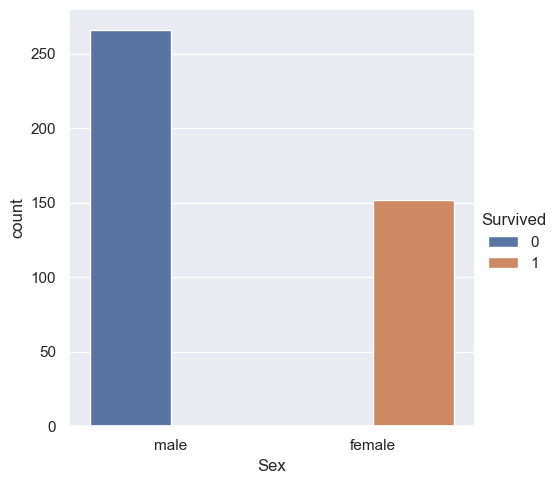

In [67]:
sns.catplot(data=titanic, x='Sex', hue='Survived', kind='count')

What this plot shows that in our data, all male passengers have the survival status `0` and all the female passengers have the survival status `1`. This means, either all male passengers survived or they all died, same is the case with the female passengers. This is why we see only one count-bar per gender in the above plot. This fact is corroborated when we calculate the counts based on gender.

In [68]:
# counts based on gender
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

One more example of a feature that we think would influence the survivability is the passenger class, denoted in the data in the column 'Pclass'. It is a categorical variable as well, but it has been given numerical values already.

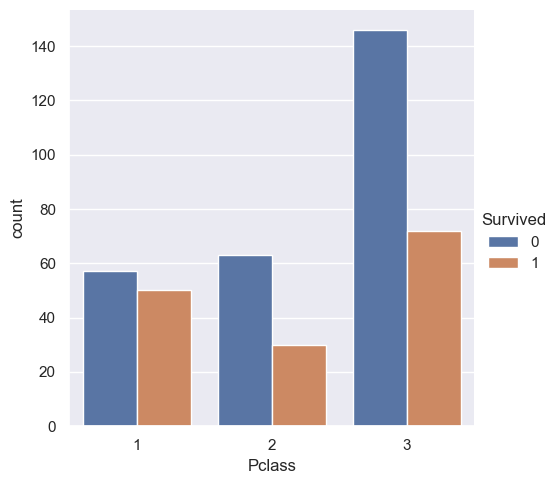

In [69]:
# survival based on Pclass
sns.catplot(data=titanic, x='Pclass', hue='Survived', kind='count')

> ## Label Encoding

For feeding categorical variables into a machine learning model, we need to first convert them into numerical ones. This is done using a technique known as Label encoding. We have to perform label encoding on the 'Sex' and the 'Embarked' columns.

Here, we employ two techniques to get this done. First, we convert the categorical variable 'Embarked' into a numerical using the `pandas.get_dummies()` function. This converts the categorical column into a multiple number of numerical columns with the value being one for the particular category and 0 for others. 

Next, for the 'Sex' column, we use the `LabelEncoder` class from `scikit-learn` for encoding our categorical data. This gives the gender a numerical value '0' or '1'.

In [70]:
# label encode the 'Embarked' column
titanic_encoded = pd.get_dummies(titanic, columns=['Embarked'])
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,0,1


In [71]:
# label encode the 'Sex' column
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
titanic_encoded['Sex'] = labels.fit_transform(titanic_encoded['Sex'])

In [72]:
titanic_encoded['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

> ## Modelling the data

Now, having preprocessed the data, we move forward to build a machine learning model for out data. First, we separate the data into the features matrix and the target matrix.

In [73]:
# separate the features and target
X = titanic_encoded.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = titanic_encoded['Survived']

Next, we split the data into training and test data.

In [74]:
# split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [75]:
# look how the training and test data looks like
print('Shapes :')
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

Shapes :
X_train :  (334, 9)
X_test :  (84, 9)
y_train :  (334,)
y_test :  (84,)


We intend to use the Logistic Regression model for our data. So, we import the relevant class from scikit-learn and also import the metrics necessary to adjudge the accuracy of predictions of our model. We then train our model and then employ it to predict the survival status on our test data.

In [76]:
# import the model class and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [77]:
# instantiating a logistic regression model
# specifiying number of iterations resolves the warnings
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [78]:
# fitting the model to our training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [79]:
# ascertaining the accuracy of predictions on our training data
train_predictions = model.predict(X_train)
training_accuracy = accuracy_score(train_predictions, y_train)
print('Accuracy on training data : {:.2f}%'.format(training_accuracy * 100))

Accuracy on training data : 100.00%


In [80]:
# deploying the model on our test data and ascertaining its accuracy
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print('Accuracy on test data : {:.2f}%'.format(test_accuracy * 100))

Accuracy on test data : 100.00%


This shows that our model has been accurate in predicting the survival status of passengers in our test data.